In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/dataset/7-7-faces"

image_data_generator = ImageDataGenerator(
    rescale=1./255.0,
    validation_split=0.1,
    horizontal_flip=True,
    brightness_range=(0.9,1.1)
  )

dataset_train = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    shuffle=True,
    subset="training",
    class_mode="categorical",
    batch_size=32
)

dataset_validation = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    subset="validation",
    class_mode="categorical",
    shuffle=False,
    batch_size=32
)



print(dataset_train.class_indices)

Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.
{'Ali_Khamenei': 0, 'Angelina_Jolie': 1, 'Barak_Obama': 2, 'Behnam_Bani': 3, 'Donald_Trump': 4, 'Emma_Watson': 5, 'Han_Hye_Jin': 6, 'Kim_Jong_Un': 7, 'Leyla_Hatami': 8, 'Lionel_Messi': 9, 'Michelle_Obama': 10, 'Morgan_Freeman': 11, 'Queen_Elizabeth': 12, 'Scarlett_Johansson': 13}


In [4]:
my_model = MobileNetV2(input_shape=(224,224,3),
    weights='imagenet',
    include_top=False,
    pooling="avg",
    classes=14
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
my_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 412,160 (1.57 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

In [6]:
for layer in my_model.layers[:-4]:
    layer.trainable = False

In [11]:
model = models.Sequential([

    my_model,

    layers.Dropout(0.3),
    layers.Dense(14, activation='softmax')
])


model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
history = model.fit(dataset_train, batch_size=32, epochs=10, validation_data=dataset_validation)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6634 - loss: 1.1358 - val_accuracy: 0.7710 - val_loss: 0.9803
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9818 - loss: 0.1051 - val_accuracy: 0.8244 - val_loss: 0.6939
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9807 - loss: 0.0657 - val_accuracy: 0.8092 - val_loss: 0.7473
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9971 - loss: 0.0249 - val_accuracy: 0.7939 - val_loss: 1.0899
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9956 - loss: 0.0230 - val_accuracy: 0.8397 - val_loss: 0.7860
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9966 - loss: 0.0164 - val_accuracy: 0.8550 - val_loss: 0.8955
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9989 - loss: 0.0106 - val_accuracy: 0.8473 - val_loss: 0.8892
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9995 - loss: 0.0043 - val_accuracy: 0.8473 - val_loss:

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │        17,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,706,014 (10.32 MB)

 Trainable params: 430,094 (1.64 MB)

 Non-trainable params: 1,845,824 (7.04 MB)

 Optimizer params: 430,096 (1.64 MB)

In [14]:
model.save("model.h5")

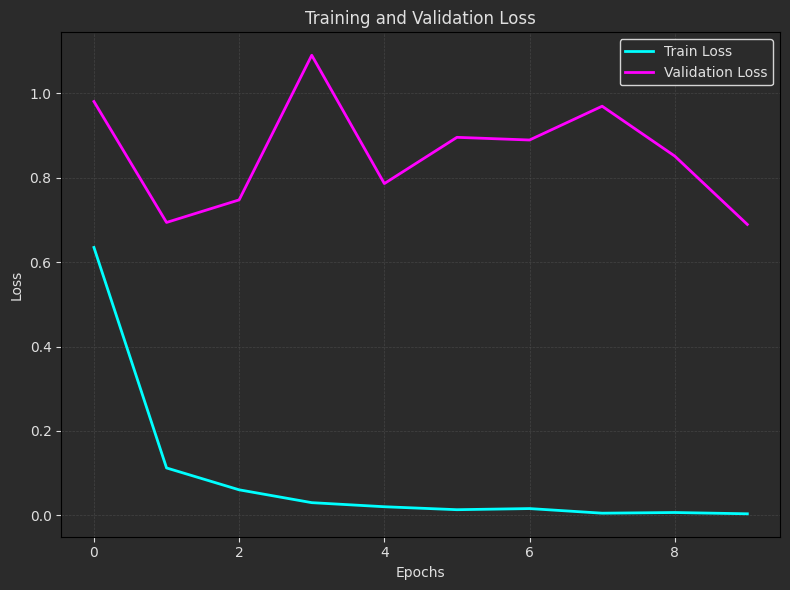

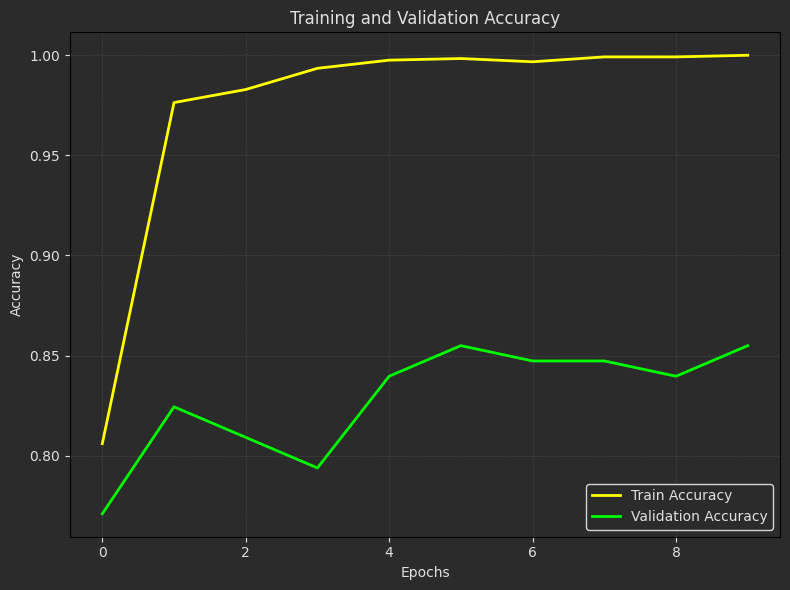

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['loss'], label='Train Loss', color='cyan', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linewidth=2)

ax.set_title('Training and Validation Loss', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Loss', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()



fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['accuracy'], label='Train Accuracy', color='yellow', linewidth=2)
ax.plot(history.history['val_accuracy'], label='Validation Accuracy', color='lime', linewidth=2)

ax.set_title('Training and Validation Accuracy', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Accuracy', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()

In [16]:

y_gt = dataset_validation.classes
y_pred = model.predict(dataset_validation)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_gt, y_pred)
conf_matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


array([[ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1],
       [ 0,  0,  7,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  5,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  6]])

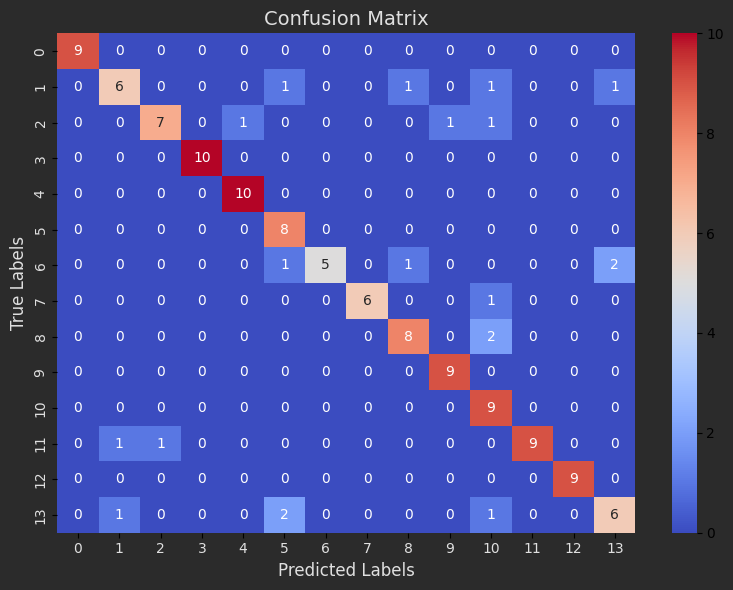

In [17]:
import seaborn as sns

plt.figure(figsize=(8, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#2b2b2b')

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Confusion Matrix", fontsize=14, color='#e0e0e0')
plt.xlabel("Predicted Labels", fontsize=12, color='#e0e0e0')
plt.ylabel("True Labels", fontsize=12, color='#e0e0e0')
plt.xticks(color='#e0e0e0')
plt.yticks(color='#e0e0e0')

plt.tight_layout()
plt.show()


In [18]:

image_test_1 = cv2.imread("/content/Lionel-Messi-03_01.jpg",1)
image_test_1 = cv2.resize(image_test_1,(224,224))
image_test_1 = image_test_1 / 255.0

test_1 = model.predict(np.array([image_test_1]))
predicted_class = np.argmax(test_1)


if predicted_class == 0:
    print("Ali_Khamenei")
elif predicted_class == 1:
    print("Angelina_Jolie")
elif predicted_class == 2:
    print("Barak_Obama")
elif predicted_class == 3:
    print("Behnam_Bani")
elif predicted_class == 4:
    print("Donald_Trump")
elif predicted_class == 5:
    print("Emma_Watson")
elif predicted_class == 6:
    print("Han_Hye_Jin")
elif predicted_class == 7:
    print("Kim_Jong_Un")
elif predicted_class == 8:
    print("Leyla_Hatami")
elif predicted_class == 9:
    print("Lionel_Messi")
elif predicted_class == 10:
    print("Michelle_Obama")
elif predicted_class == 11:
    print("Morgan_Freeman")
elif predicted_class == 12:
    print("Queen_Elizabeth")
elif predicted_class == 13:
    print("Scarlett_Johansson")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Lionel_Messi
